In [1]:
import numpy as np # importa biblioteca numpy
from sklearn.model_selection import train_test_split  # importa biblioteca de teste e treino
from sklearn.tree import DecisionTreeClassifier # importa a arvore de decisão
from sklearn import tree # importa a função tree para plotar a arvore
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pandas as pd # importa a biblioteca pandas
import matplotlib.pyplot as plt # importa a matplotlib
import seaborn as sns  # importa a seaborn

In [2]:
# criando a base de dados
data = pd.DataFrame({
    'idade':[2,6,1,4,3,5],
    'tempo':[50,200,20,150,100,180],
    'falhas':[0,2,0,1,3,2],
    'classif':['necessita','necessita','necessita','não necessita','necessita',
               'não necessita']
})

Acuracia: 0.5
Precisao: 1.0


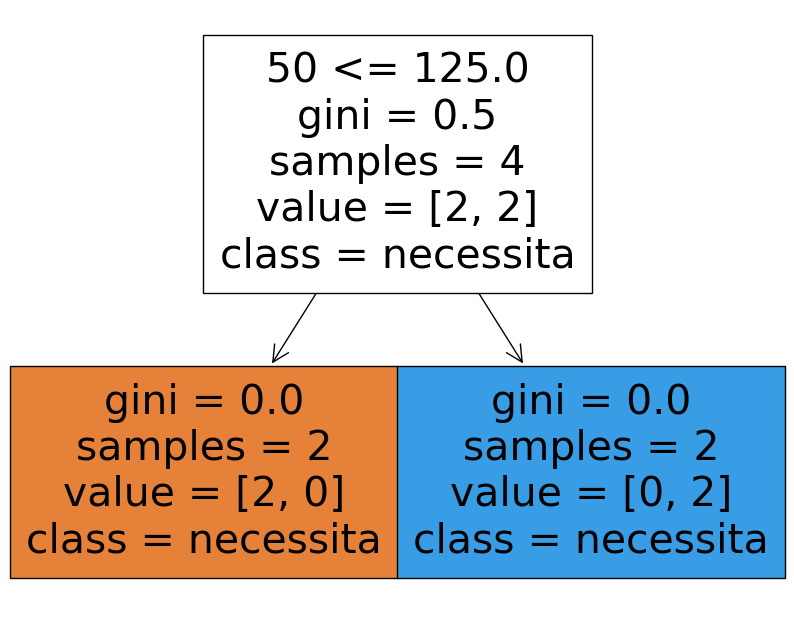

In [13]:
x=np.array(data['tempo']) # pega a coluna de tempo do dataframe
y=np.array(data['classif']) # pega a coluna de classificação do dataframe 
x_treino,x_teste,y_treino,y_teste = train_test_split(x.reshape(-1,1),y.reshape(-1,1),
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
precisao = precision_score(y_teste,prev,pos_label='necessita')
matrix = confusion_matrix(y_teste,prev)
print("Acuracia:",acurracy)
print("Precisao:",precisao)
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=x.tolist(),class_names=y.tolist(),filled=True)
plt.show()


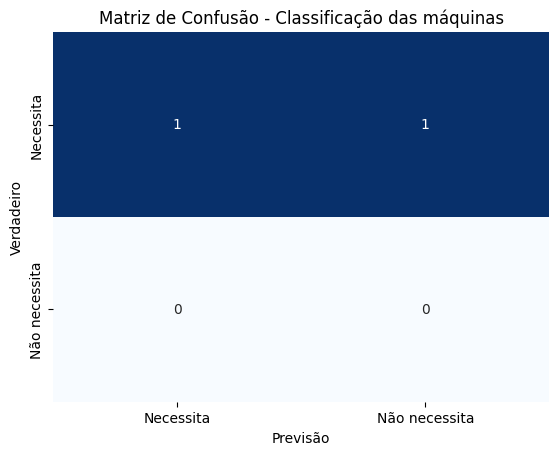

In [14]:
sns.heatmap(matrix,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Necessita','Não necessita'],yticklabels=['Necessita','Não necessita'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.show()